In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


>we have 254 datapoints.

>we will calculate the atr fortnightly

>we will calculate +/- DM for every 14 datapoints and will save it

>Use +DM when current high - previous high > previous low - current low. Use -DM when previous low - current low > current high - previous high.

>TR is the greater of the current high - current low, current high - previous close, or current low - previous close.

>though wilder the proposer the index didi it in periods of 14 days in the modern world the calculation is done for each single day and so are we gonna do that only




In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link ='https://drive.google.com/file/d/1zH9nR-g8BRiu2BTyGPIoqWo2s0mK21fN/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('stock_prices_mod.csv') 
 
df = pd.read_csv('stock_prices_mod.csv')


In [4]:
dates = np.array(df['Date'])
open = np.array(df['Open'])
close= np.array(df['Close'])
high= np.array(df['High'])
low= np.array(df['Low'])

In [5]:
def weightedmovingaverage(Data, period):
    weighted=np.empty(253)
    matrix = np.empty(14)
    total = np.arange(1, period + 1, 1)
    for i in range(253):
      if(i - period + 1>=0):
        matrix= [Data[j] for j in range(i - period + 1,i+1)]
        matrix = np.multiply(total,matrix)
        wma = (matrix.sum()) / (total.sum()) # WMA
        weighted[i] =  wma
      else:
        sum=0
        for k in range(i+1):
          sum+= (k+1)*(Data[k])
        wma1 = sum/((i+1)*(i+2)/2)
        weighted[i] = wma1
    return weighted

PDM = np.zeros(253)
NDM = np.zeros(253)
TR  = np.zeros(253)
PDI = np.zeros(253)
NDI = np.zeros(253)
ADX = np.zeros(253)
PDM[0]=0.05
NDM[0]=0


for i in range(1,253):
  x=high[i]-high[i-1]
  y=low[i-1]-low[i]
  if x>y and x>0:
    PDM[i]=x  
  elif y>x and y>0:
    NDM[i]=y 
TR=np.zeros(253)
TR[0]=high[0]-low[0]
for j in range(1,253):
  a=high[j]-low[j]
  b=np.absolute(high[j]-close[j-1])
  c=np.absolute(low[j]-close[j-1])
  d= np.array([a,b,c])
  TR[j]=np.max(d)

ATR  = weightedmovingaverage(TR,14)
SPDM = weightedmovingaverage(PDM,14)
SNDM = weightedmovingaverage(NDM,14)
#print(ATR)
#print(SPDM)
#print(SNDM)
for p in range(1,253):
  PDI[p]=100*(SPDM[p]/ATR[p])
  NDI[p]=100*(SNDM[p]/ATR[p])


DX=np.zeros(253)
for r in range(1,253):
  DX[r]=100*np.abs((PDI[r]-NDI[r])/(PDI[r]+NDI[r]))
ADX=weightedmovingaverage(DX,14)


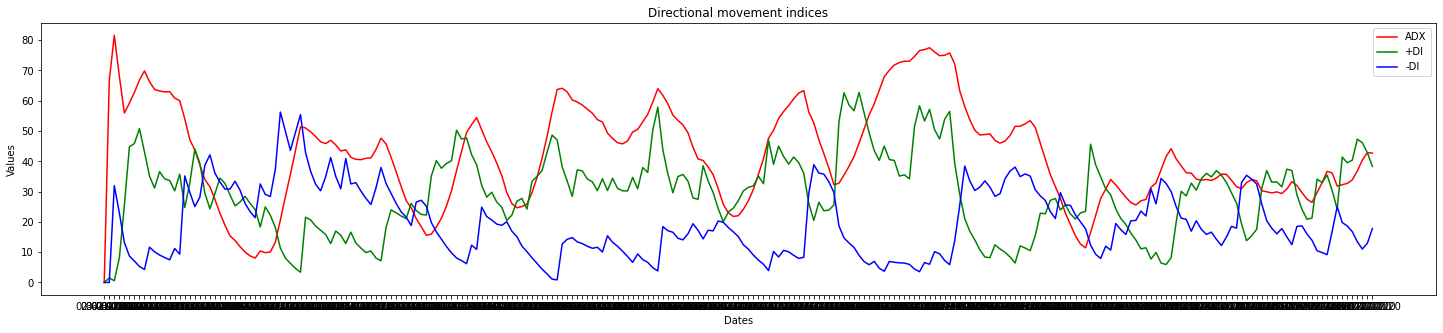

In [6]:


plt.rcParams["figure.figsize"] = (25,5)
  
# x axis values
  
# giving a title to my graph
plt.title('ADX of the Dataset')
x = dates  
#hdfwdhfidgfiwgfikgfigkgfik
y1 = ADX
y2 = PDI
y3 = NDI
  
# Plotting both the curves simultaneously
plt.plot(x, y1, color='r', label='ADX')
plt.plot(x, y2, color='g', label='+DI')
plt.plot(x, y3, color='b', label='-DI')  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Dates")
plt.ylabel("Values")
plt.title("Directional movement indices")


# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()
  
